In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Phoneme — распознавание голоса (Andreas Buja, Werner Stuetzle and Martin Maechler)

$4509$ $\log$-периодограмм длины $d = 256$ (все признаки количественные).

«sh» as in «she»

«dcl» as in «dark»

«iy» as the vowel in «she»

«aa» as the vowel in «dark»

«ao» as the first vowel in «water»

In [2]:
#import urllib
#url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/phoneme.data"
#raw_data = urllib.urlopen(url)
#X = np.loadtxt(raw_data, delimiter = ",", usecols = range(4)) # загрузка первых 4 столбцов
X = np.loadtxt('../source/phoneme.data', delimiter = ",", dtype = float, skiprows = 1, usecols = range(1, 257))
y = np.loadtxt('../source/phoneme.data', delimiter = ",", dtype = str, skiprows = 1, usecols = [257])
(N, d) = X.shape

In [3]:
print N, d

4509 256


In [4]:
y_names = np.unique(y)
print y_names

['aa' 'ao' 'dcl' 'iy' 'sh']


In [5]:
print 'Phoneme  Count'
for i in range(5):
    print '  %3s    %4s' % (y_names[i], np.count_nonzero(y == y_names[i]))

Phoneme  Count
   aa     695
   ao    1022
  dcl     757
   iy    1163
   sh     872


In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
N_test, _ = X_test.shape

In [7]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = lda_model.predict(X_train)
y_test_pred  = lda_model.predict(X_test)
print np.mean(y_train_pred != y_train)
print np.mean(y_test_pred  != y_test)

0.0593290823399
0.0742793791574


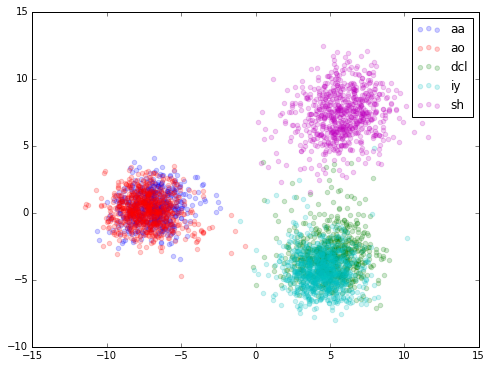

In [8]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
colors = ['b', 'r', 'g', 'c', 'm']
plt.figure(figsize = (8, 6))
for i in range(5):
    plt.scatter(X_lda[y_train == y_names[i], 0], X_lda[y_train == y_names[i], 1], 
                color = colors[i], label = y_names[i], alpha = 0.2)
plt.legend()

In [12]:
print 'n components', 'train error', 'test error'
for n_comp in range(1, 5):
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    X_train_lda = lda_model.transform(X_train)
    X_test_lda  = lda_model.transform(X_test)
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_lda, y_train)   # Здесь можно использовать любой другой классификатор (размерность меньше!)
    y_train_pred = lda_model.predict(X_train_lda)
    y_test_pred  = lda_model.predict(X_test_lda)
    print '      %s        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

n components train error test error
      1         0.4591     0.4812
      2         0.2595     0.3204
      3         0.1223     0.1585
      4         0.0593     0.0743
